In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [219]:
STEP = 0.01
N_STEPS = 500
    
length = lambda v: np.linalg.norm(v)
normalize = lambda v: v * (1.0/length(v))
cross = np.cross
dot = np.dot
acos = np.arccos
sin = np.sin
cos = np.cos

M_PI = np.pi

In [220]:
def trace_fan(func, angle_min = 0.0, angle_max = 45, n_rays = 30):

    torad = lambda a: a / 180.0 * np.pi
    pos0 = (-4,0,0)
    spread_ang = 25 
    
    paths_x = np.zeros((N_STEPS, n_rays))
    paths_y = paths_x*0
    
    angles = np.linspace(torad(angle_min), torad(angle_max), n_rays+1)[1:]

    for j in range(len(angles)):
        
        path = np.zeros((N_STEPS,3)) + np.nan
        
        a = angles[j]
        ray = (np.cos(a), np.sin(a), 0)
        
        pos = np.ravel(pos0).T * 1.0
        ray = np.ravel(ray).T * 1.0
        
        func(pos, ray, path)
        paths_x[:,j] = path[:,0]
        paths_y[:,j] = path[:,1]
        
    plt.plot(paths_x, paths_y)
    
    PLT_SCALE = 5
    
    plt.xlim([-PLT_SCALE,PLT_SCALE])
    plt.ylim([-PLT_SCALE,PLT_SCALE])

In [221]:
def trace_line(pos, ray, path):
    
    for i in xrange(N_STEPS):
        path[i,:] = pos
        pos += ray*STEP

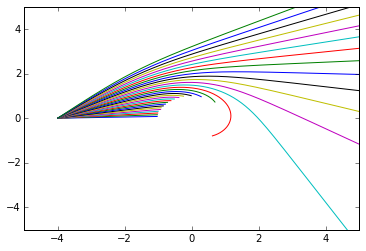

In [222]:
def trace_u(pos, ray, path):
    
    u = 1.0 / length(pos)
    
    n = normalize(cross(pos, ray))
    x = normalize(pos)
    y = cross(n,x)
    
    du = -dot(ray,x) / dot(ray,y) * u
    
    theta = M_PI*0.5 - acos(dot(x,ray))
    y = ray
    x = cross(y,n)
    
    MAX_REVOLUTIONS = 2
    step = 2.0*M_PI*MAX_REVOLUTIONS / float(N_STEPS)
    
    for j in range(N_STEPS):
        
        path[j,:] = pos

        ddu = -u*(1.0 - 1.5*u*u)
        u += du*step

        if u < 0.0: break

        du += ddu*step

        theta += step

        old_pos = pos
        pos = (cos(theta)*x + sin(theta)*y)/u
        
        if u > 1.0: break # even horizon is at 1
        
trace_fan(trace_u)

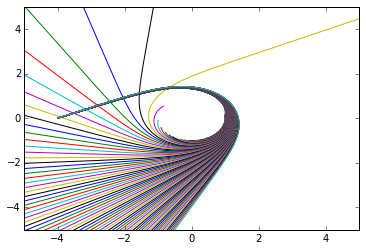

In [224]:
trace_fan(trace_u, angle_min = 25, angle_max = 26, n_rays = 200)